<a href="https://colab.research.google.com/github/Wahiba275/Tabou-search-from-scratch/blob/main/Tabou_serach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# les librairies nécessaires
from collections import deque
import random
# je défini la fonction de calcul de la distance totale d'un itinéraire
def calculate_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        city1 = route[i]
        city2 = route[i + 1]
        total_distance += distances[cities.index(city1)][cities.index(city2)]
    return total_distance
# je défini la fonction de recherche tabou
def tabou_search(max_iterations, tabou_list_size):
    # j'initialise la liste tabou et l'itinéraire courant avec un itinéraire aléatoire
    tabou_list = deque(maxlen=tabou_list_size)
    current_route = random.sample(cities, len(cities))
    best_route = current_route.copy()
    # j'itère sur le nombre maximal d'itérations
    for _ in range(max_iterations):
        # je parcourt toutes les permutations possibles de l'itinéraire courant
        for i in range(len(current_route)):
            for j in range(i + 1, len(current_route)):
                new_route = current_route[:i] + current_route[i:j][::-1] + current_route[j:]
                # Si la nouvelle route est plus courte que la meilleure route actuelle et qu'elle n'est pas taboue, on la met à jour
                if calculate_distance(new_route) < calculate_distance(best_route) and new_route not in tabou_list:
                    best_route = new_route
                    tabou_list.append(new_route)
        # je mis à jour l'itinéraire courant avec la meilleure route trouvée
        current_route = best_route.copy()
    return best_route


In [ ]:
# définition des villes et leurs distances
cities = ["Casablanca", "Rabat", "Tanger", "Fes", "Ouarzazate"]
distances = [
    [0, 75, 338, 294, 431],
    [75, 0, 249, 207, 513],
    [338, 249, 0, 398, 764],
    [294, 207, 398, 0, 722],
    [431, 513, 764, 722, 0]
]


In [ ]:
best_root=tabou_search(30,5)
print(best_root)
print("best distance : "+str(calculate_distance(best_root)))

['Ouarzazate', 'Casablanca', 'Rabat', 'Tanger', 'Fes']
best distance : 1153


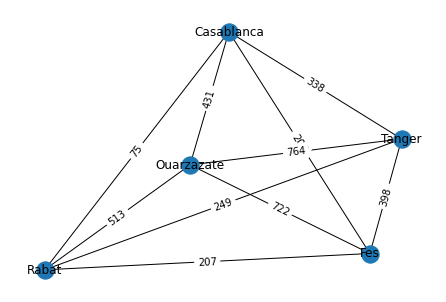

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

G.add_node("Casablanca")
G.add_node("Rabat")
G.add_node("Tanger")
G.add_node("Fes")
G.add_node("Ouarzazate")

G.add_edge("Ouarzazate","Casablanca" , weight=431)
G.add_edge("Casablanca", "Rabat", weight=75)
G.add_edge("Casablanca", "Tanger", weight=338)
G.add_edge("Casablanca", "Fes", weight=207)
G.add_edge("Rabat", "Fes", weight=207)
G.add_edge("Rabat", "Ouarzazate", weight=513)
G.add_edge("Rabat", "Tanger", weight=249)
G.add_edge("Tanger", "Fes", weight=398)
G.add_edge("Tanger", "Ouarzazate", weight=764)
G.add_edge("Fes", "Ouarzazate", weight=722)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()
